This notebook aims to check the distribution of hydrocarbons emission/distribution in the Arctic

The pseudonetcdf engine will cause a bug in reading the varnames:
PseudoNetCDF/icarttfiles/ffi1001.py:

> elif li == self.n_header_lines:
>
>    varstr = line.replace(',', ' ').replace('  ', ' ')

It should be modifed to `varstr = line.replace('"', '')` because these data use space instead comma and use comma in chmeical names.

## DC8 observation during ARCTAS-B

During ARCTAS-B, only the Flight 23 flied above 70N.

We checked the CH4 and CO to see whether it's affected by fir or other pollutions.

In [1]:
import xarray as xr
import proplot as pplt

## 2008-07-08 (Flight 21)

In [2]:
ds_nav = xr.open_dataset('../data/DC8/20080708/nav_dc8_20080708_r1.ict', engine='pseudonetcdf')
ds_nav = ds_nav.swap_dims({'POINTS': 'UTC'}).rename({"UTC": "t"})

**PNC:/home/xin/miniconda3/lib/python3.9/site-packages/PseudoNetCDF/pncwarn.py:24:UserWarning:
  NetCDF: Not a valid ID


In [3]:
#  CO CH4 N2O
ds_dacom = xr.open_dataset('../data/DC8/20080708/DACOM_DC8_20080708_R2.ict', engine='pseudonetcdf')
ds_dacom = ds_dacom.swap_dims({'POINTS': 'UT_Time'}).rename({"UT_Time": "t"})
ds_nav_interp = ds_nav.interp(t=ds_dacom['t'])

ds_dacom = xr.merge([ds_dacom, ds_nav_interp[['LON', 'LAT', 'GPS_ALT']]])

# drop missing value
mask = (ds_dacom['CH4_ppbv']!=ds_dacom['CH4_ppbv'].attrs['fill_value']) & \
        (ds_dacom['CO_ppbv']!=ds_dacom['CO_ppbv'].attrs['fill_value'])

ds_dacom = ds_dacom.where(mask, drop=True)

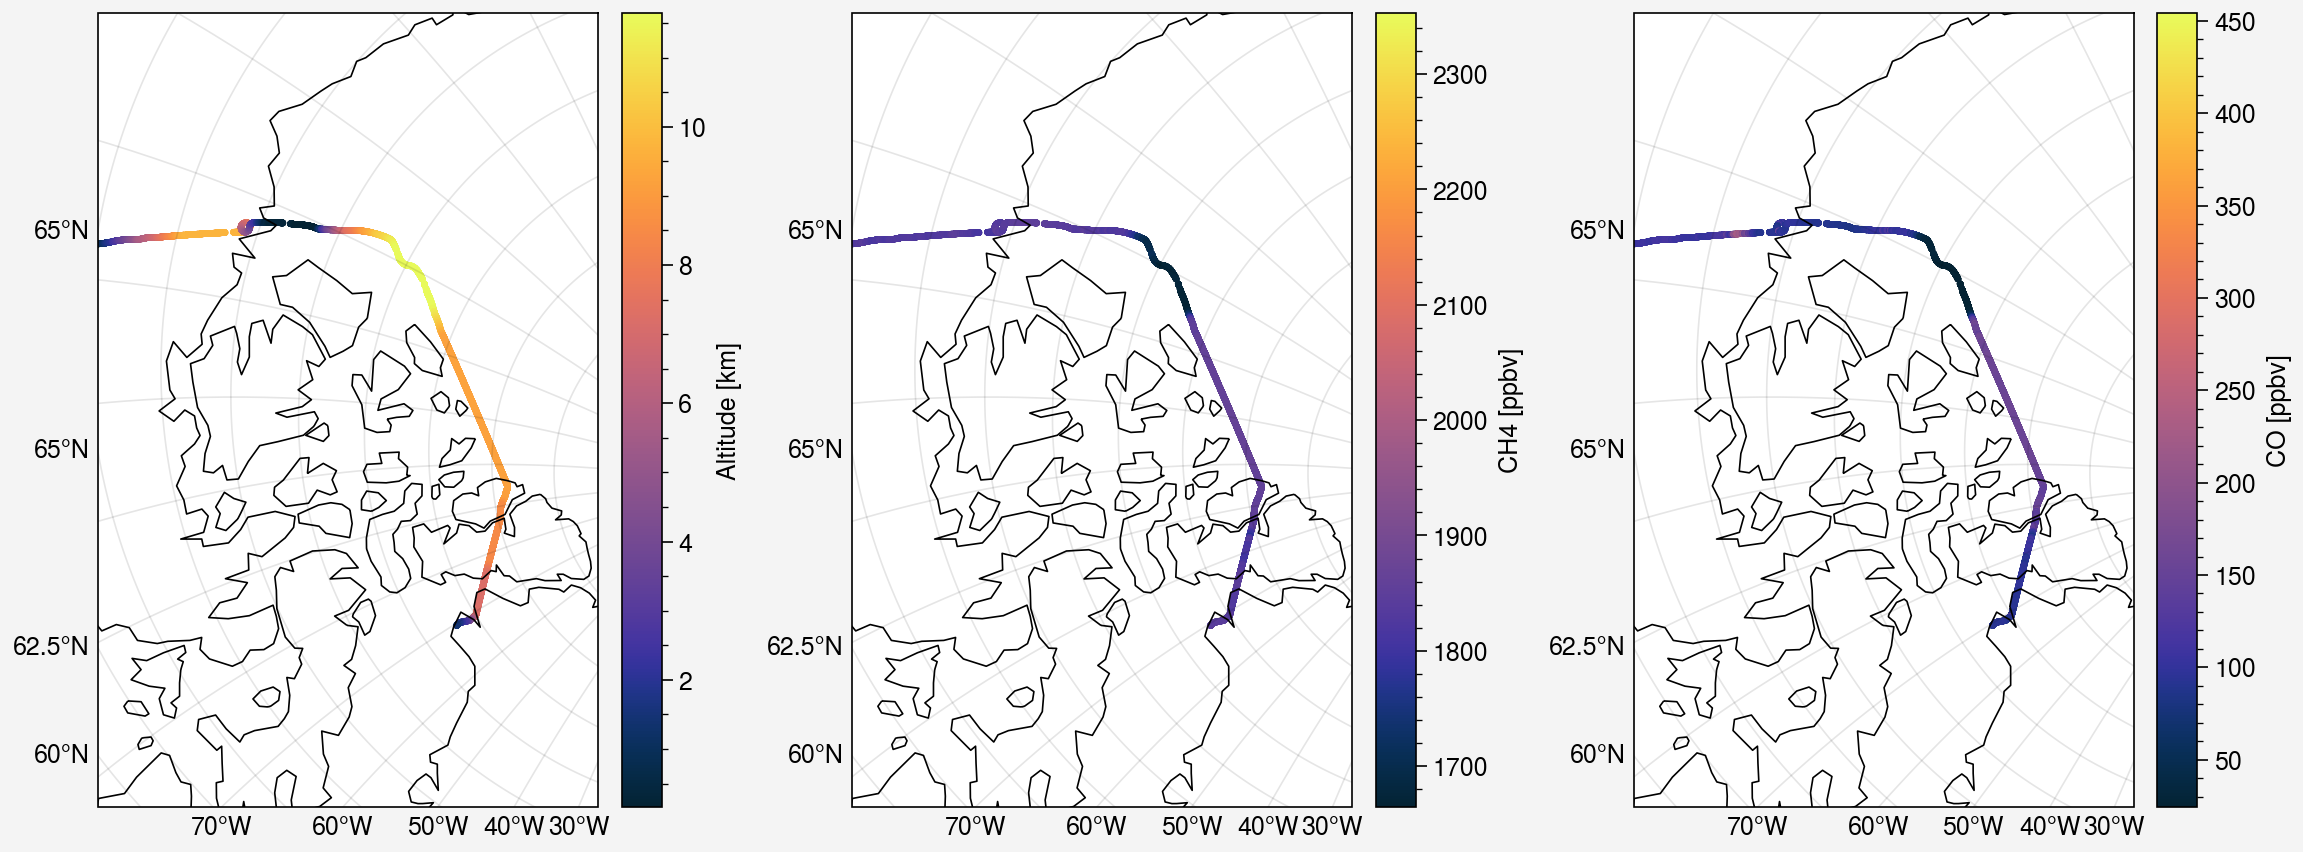

In [4]:
fig, axs = pplt.subplots(ncols=3, proj='stere')

ax = axs[0]
s = ax.scatter(ds_dacom['LON'], ds_dacom['LAT'], c=ds_dacom['GPS_ALT']/1e3, cmap='Thermal', s=3)
ax.colorbar([s], label='Altitude [km]')

ax = axs[1]
s = ax.scatter(ds_dacom['LON'], ds_dacom['LAT'], c=ds_dacom['CH4_ppbv'], cmap='Thermal', s=3)
ax.colorbar([s], label='CH4 [ppbv]')

ax = axs[2]
s = ax.scatter(ds_dacom['LON'], ds_dacom['LAT'], c=ds_dacom['CO_ppbv'], cmap='Thermal', s=3)
ax.colorbar([s], label='CO [ppbv]')


axs.format(latlim=(65, 82), lonlim=(-140, -65),
           labels=True,
           coast=True,
           )

Pick the part above 11 km:

In [5]:
ut_mask = ds_dacom['GPS_ALT'] > 11e3
ds_dacom_ut = ds_dacom.where(ut_mask, drop=True)

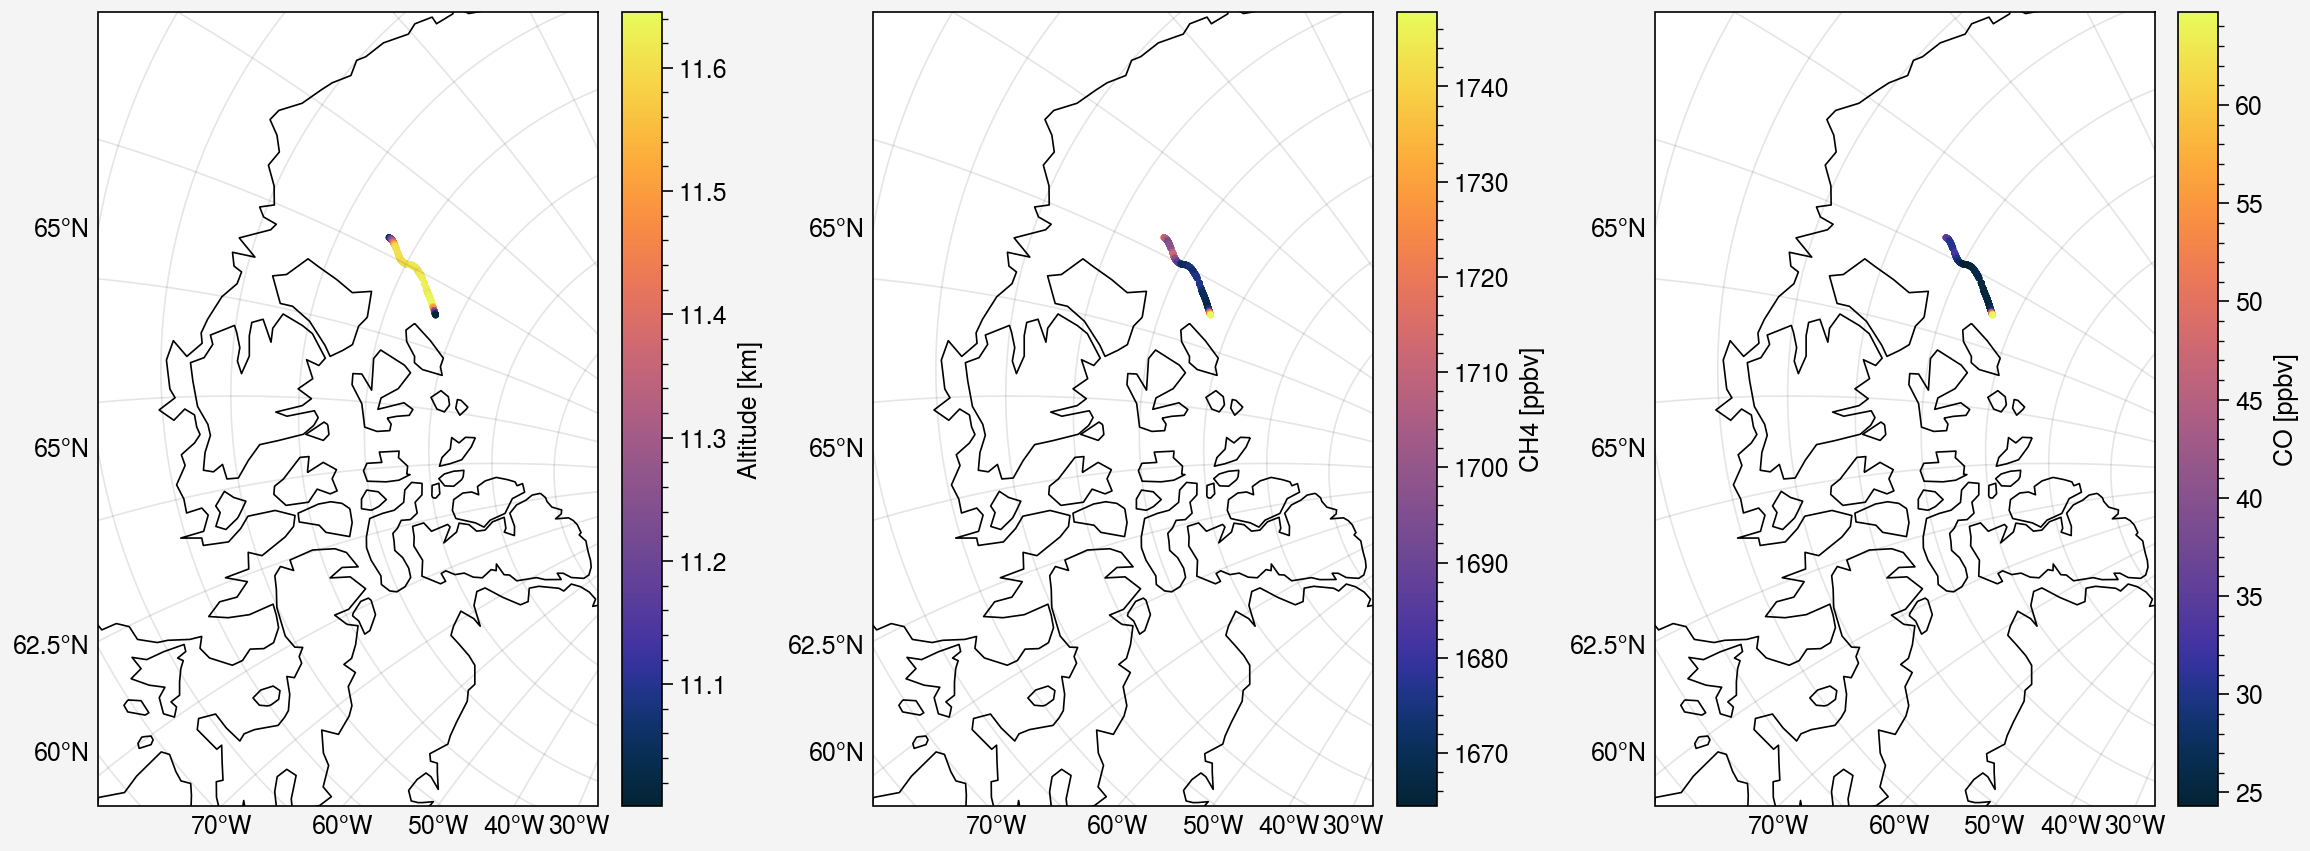

In [6]:
fig, axs = pplt.subplots(ncols=3, proj='stere')

ax = axs[0]
s = ax.scatter(ds_dacom_ut['LON'], ds_dacom_ut['LAT'], c=ds_dacom_ut['GPS_ALT']/1e3, cmap='Thermal', s=3)
ax.colorbar([s], label='Altitude [km]')

ax = axs[1]
s = ax.scatter(ds_dacom_ut['LON'], ds_dacom_ut['LAT'], c=ds_dacom_ut['CH4_ppbv'], cmap='Thermal', s=3)
ax.colorbar([s], label='CH4 [ppbv]')

ax = axs[2]
s = ax.scatter(ds_dacom_ut['LON'], ds_dacom_ut['LAT'], c=ds_dacom_ut['CO_ppbv'], cmap='Thermal', s=3)
ax.colorbar([s], label='CO [ppbv]')


axs.format(latlim=(65, 82), lonlim=(-140, -65),
           labels=True,
           coast=True,
           )

In [7]:
ds_ucigc = xr.open_dataset('../data/DC8/20080708/UCIGC_DC8_20080708_R2.ict', engine='pseudonetcdf').swap_dims({'POINTS': 'Mid_UTC'}).rename({"Mid_UTC": "t"})
ds_ucigc['t'] = ds_ucigc['t'].astype('timedelta64[s]')
ds_ucigc = xr.merge([ds_ucigc, ds_nav.interp(t=ds_ucigc['t'])[['LON', 'LAT', 'GPS_ALT']]])

**PNC:/home/xin/miniconda3/lib/python3.9/site-packages/PseudoNetCDF/pncwarn.py:24:UserWarning:
  NetCDF: Not a valid ID


In [8]:
c2h6 = ds_ucigc['Ethane_pptv']
c3h8 = ds_ucigc['Propane_pptv']
C4h10 = ds_ucigc['i-Butane_pptv'] + ds_ucigc['n-Butane_pptv']
c6h6 = ds_ucigc['Benzene_pptv']
c6h14 = ds_ucigc['n-Hexane_pptv']

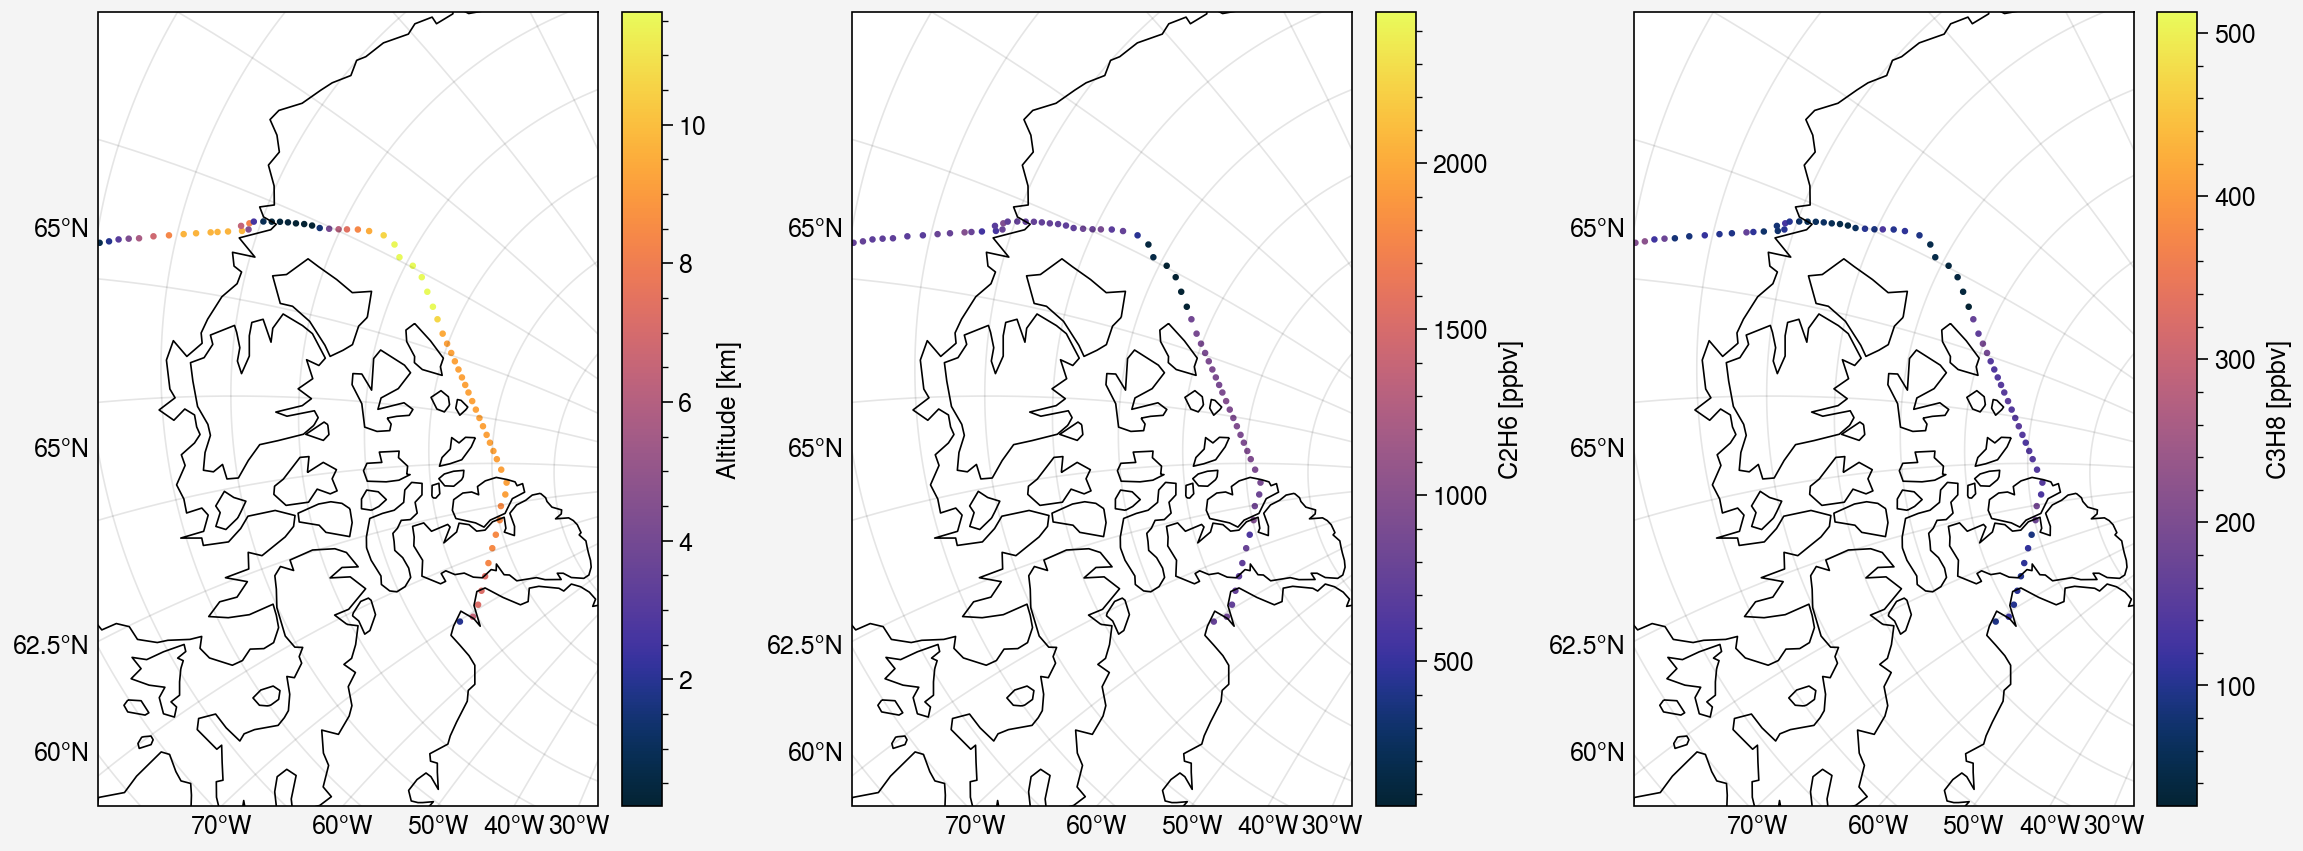

In [9]:
fig, axs = pplt.subplots(ncols=3, proj='stere')

ax = axs[0]
s = ax.scatter(ds_ucigc['LON'], ds_ucigc['LAT'], c=ds_ucigc['GPS_ALT']/1e3, cmap='Thermal', s=3)
ax.colorbar([s], label='Altitude [km]')

ax = axs[1]
s = ax.scatter(ds_ucigc['LON'], ds_ucigc['LAT'], c=c2h6, cmap='Thermal', s=3)
ax.colorbar([s], label='C2H6 [ppbv]')

ax = axs[2]
s = ax.scatter(ds_ucigc['LON'], ds_ucigc['LAT'], c=c3h8, cmap='Thermal', s=3)
ax.colorbar([s], label='C3H8 [ppbv]')


axs.format(latlim=(65, 82), lonlim=(-140, -65),
           labels=True,
           coast=True,
           )

## 2008-07-09 (Flight 22)

In [10]:
ds_nav = xr.open_dataset('../data/DC8/20080709/nav_dc8_20080709_r1.ict', engine='pseudonetcdf')
ds_nav = ds_nav.swap_dims({'POINTS': 'UTC'}).rename({"UTC": "t"})

**PNC:/home/xin/miniconda3/lib/python3.9/site-packages/PseudoNetCDF/pncwarn.py:24:UserWarning:
  NetCDF: Not a valid ID


In [11]:
#  CO CH4 N2O
ds_dacom = xr.open_dataset('../data/DC8/20080709/DACOM_DC8_20080709_R2.ict', engine='pseudonetcdf')
ds_dacom = ds_dacom.swap_dims({'POINTS': 'UT_Time'}).rename({"UT_Time": "t"})
ds_nav_interp = ds_nav.interp(t=ds_dacom['t'])

ds_dacom = xr.merge([ds_dacom, ds_nav_interp[['LON', 'LAT', 'GPS_ALT']]])

# drop missing value
mask = (ds_dacom['CH4_ppbv']!=ds_dacom['CH4_ppbv'].attrs['fill_value']) & \
        (ds_dacom['CO_ppbv']!=ds_dacom['CO_ppbv'].attrs['fill_value'])

ds_dacom = ds_dacom.where(mask, drop=True)

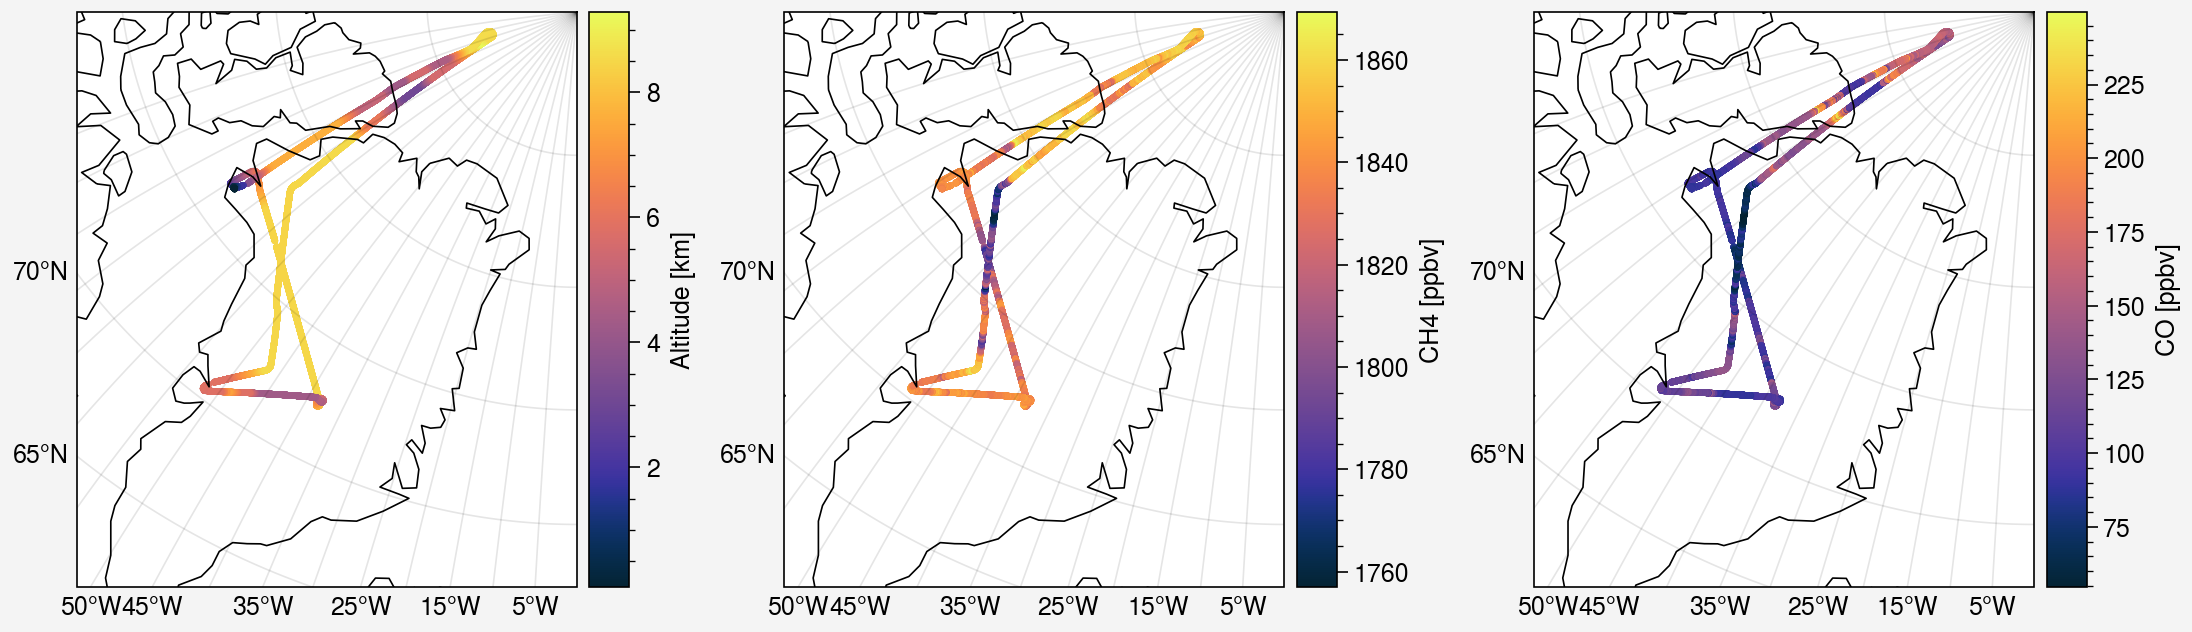

In [12]:
fig, axs = pplt.subplots(ncols=3, proj='stere')

ax = axs[0]
s = ax.scatter(ds_dacom['LON'], ds_dacom['LAT'], c=ds_dacom['GPS_ALT']/1e3, cmap='Thermal', s=3)
ax.colorbar([s], label='Altitude [km]')

ax = axs[1]
s = ax.scatter(ds_dacom['LON'], ds_dacom['LAT'], c=ds_dacom['CH4_ppbv'], cmap='Thermal', s=3)
ax.colorbar([s], label='CH4 [ppbv]')

ax = axs[2]
s = ax.scatter(ds_dacom['LON'], ds_dacom['LAT'], c=ds_dacom['CO_ppbv'], cmap='Thermal', s=3)
ax.colorbar([s], label='CO [ppbv]')

axs.format(latlim=(65, 90), lonlim=(-58, -30),
           labels=True,
           coast=True,
           )

Unfortunately, the region above 70 N is affected by fire, because the CO concentration is high.

## 2008-07-10 (Flight 23)

## Emission (ECLIPSE V6)

It's also useful to check the emission inventory.

In [13]:
ch4_emis = xr.open_dataset('../data/eclipse/ECLIPSE_V6b_CLE_base_CH4.nc').sel(time=2020)['emis_all']
voc_emis = xr.open_dataset('../data/eclipse/ECLIPSE_V6b_CLE_base_VOC.nc').sel(time=2020)['emis_all']

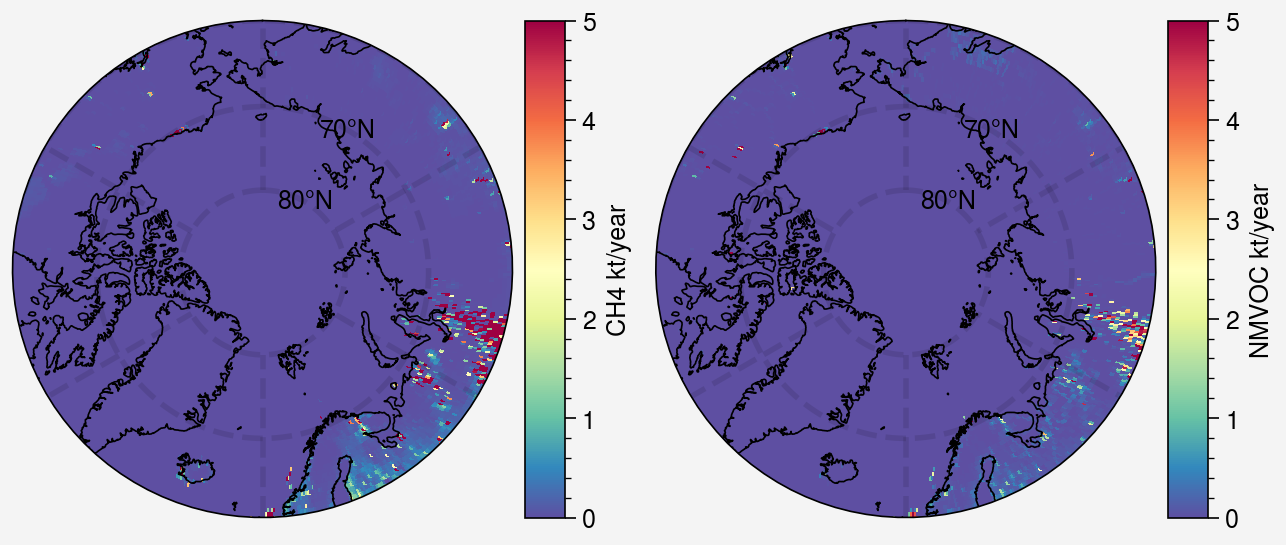

In [14]:
fig, axs = pplt.subplots(ncols=2, proj='npstere')

ax = axs[0]
m = ax.pcolormesh(ch4_emis['lon'], ch4_emis['lat'], ch4_emis, cmap='Spectral_r', vmax=5, discrete=False)
ax.colorbar([m], label=f'CH4 {ch4_emis.units}')

ax = axs[1]
m = ax.pcolormesh(voc_emis['lon'], voc_emis['lat'], voc_emis, cmap='Spectral_r', vmax=5, discrete=False)
ax.colorbar([m], label=f'NMVOC {voc_emis.units}')

axs.format(coast=True, reso='med',
        latlines=10, gridcolor='black', gridlinewidth=2, gridlinestyle='--', latinline=True,
        boundinglat=60,
        facecolor='Gray'
        )